<a href="https://colab.research.google.com/github/Sol-J/Study/blob/master/Introduction_to_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. 토픽 모델링(Topic Modeling)의 개념**

##**1-1. 토픽 모델링이란?**

토픽 모델링(Topic Modeling)이란 기계 학습 및 자연어 처리 분야에서 문서 집합의 추상적인 '주제'를 발견하기 위한 통계적 모델로, 광범위한 문서 내에서 잠재적인 의미 구조를 발견하기 위해 사용되는 프로세스를 말한다. 이때 토픽은 함께 등장할 확률이 높고 유사한 의미를 가지는 단어들의 집합이라고 할 수 있다.

주로 비정형 텍스트의 집합을 이해하기 쉽도록 정리하는 데에 쓰이고, 이외에도 이미지, 유전자 정보 등에서 유의미한 구조를 발견하는 데에 유용하게 사용되고 있다. 



## **1-2. Topic Modeling vs Topic Classification**

Topic Analysis Techniques는 대표적으로 Topic Modeling과 Topic Classification으로 나눌 수 있다. 각각의 접근법, 장단점 등은 다음 표와 같다.

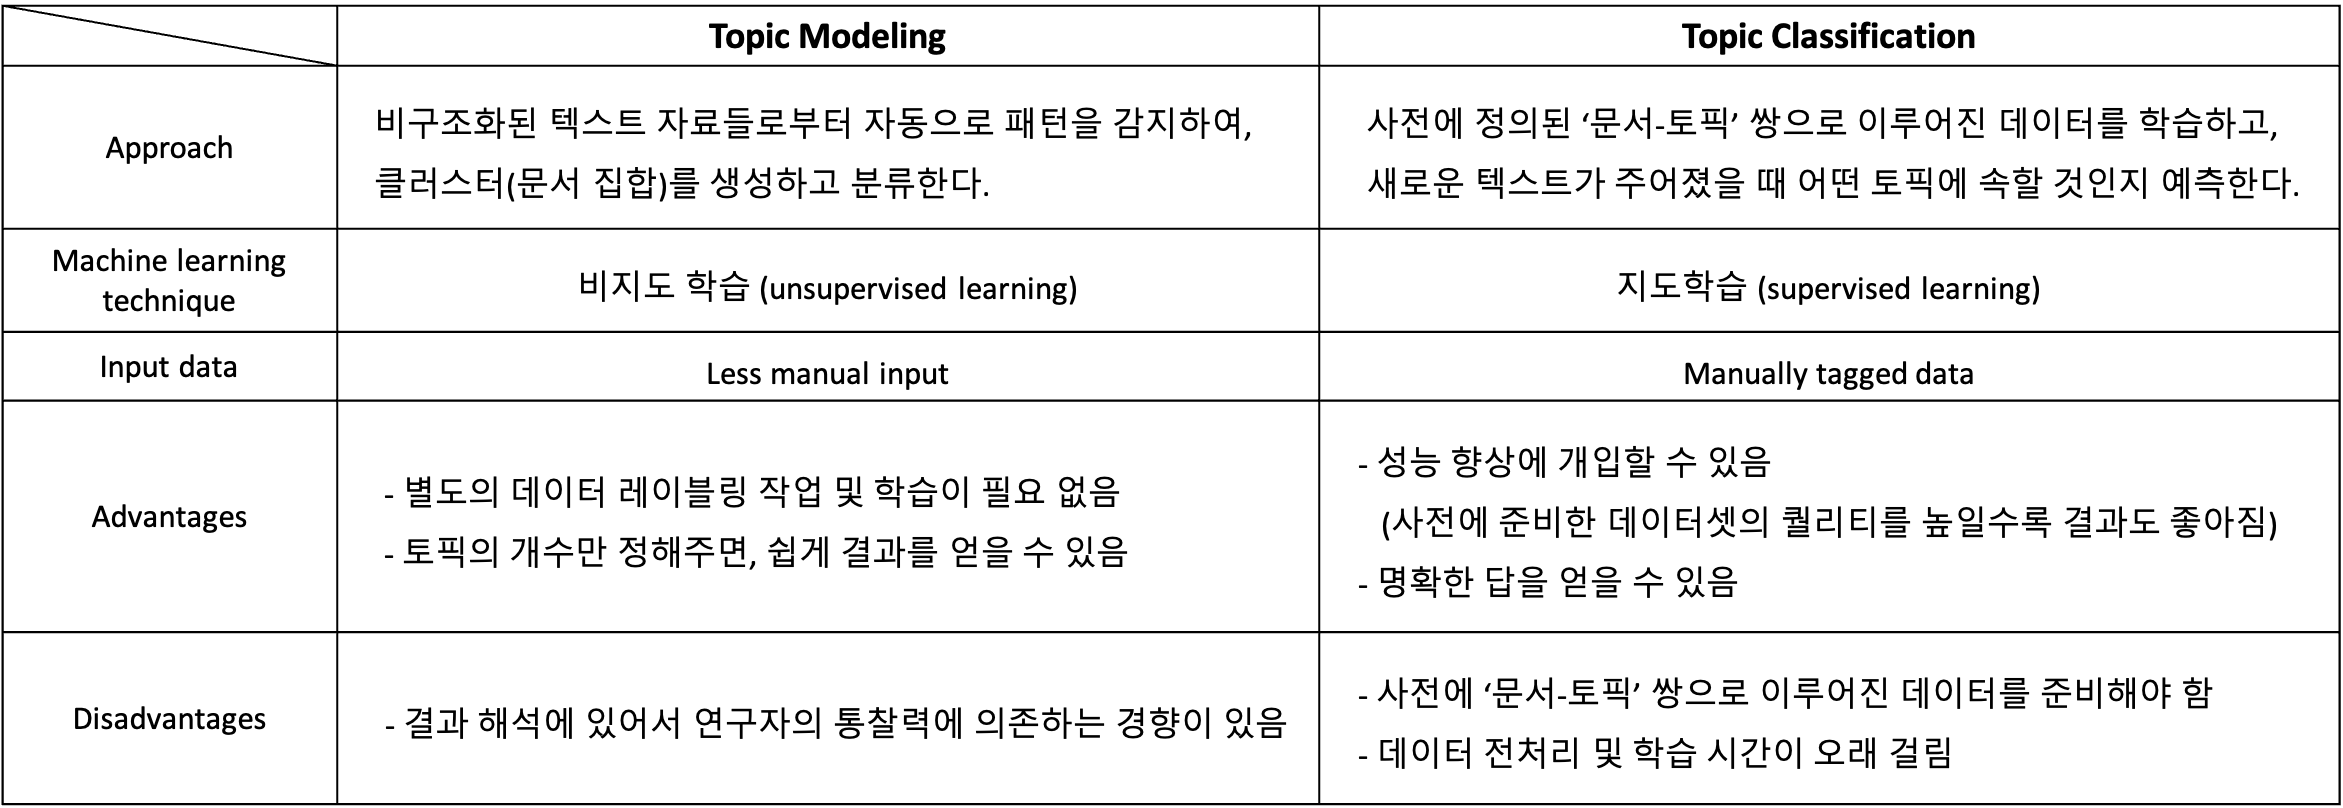

#**2. 토픽 모델링 기법**

토픽모델링 기법에는 LSA(Latent Semantic Analysis), PLSI(Probabilistic Latent Semantic Indexing), LDA(Latent Dirichlet Allocation) 등 다양하게 있는데, 이들 중 가장 범용적으로 사용되고 있는 알고리즘은 LDA이다. 

##**2-1. LDA(Latent Dirichlet Allocation)**

LDA에서는 문서들은 토픽들의 혼합으로 구성되어 있고, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정한다. 따라서 데이터가 주어지면, LDA는 문서가 생성되는 과정을 확률모형으로 모델링 하며 역추적(reverse engineering)한다.



LDA의 개략적인 도식은 아래 그림과 같다. 
*   LDA는 **(1) 특정 토픽에 특정 단어가 나타날 확률**을 알려준다. 예를 들어 아래의 노란색 토픽에는 'gene', 'dna', 'genetic'이라는 단어가 각각 0.04, 0.02, 0.01의 확률로 등장한다. 따라서 이 노란색 토픽은 대략 '유전자'와 관련된 주제라는 것을 알 수 있다. 
*   또한 LDA는 **(2) 문서에 특정 토픽이 존재할 확률**을 알려준다. 오른쪽의 문서를 보면 전반적으로 빨간색, 파란색 토픽에 해당하는 단어보다 노란색 토픽에 속하는 단어들이 많이 분포한다. 따라서 이 문서는 '유전자'와 과련된 문서일 가능성이 크다. 

*   **(1)과 (2)의 확률을 결합 확률로 추정**하여 토픽을 추출한다.

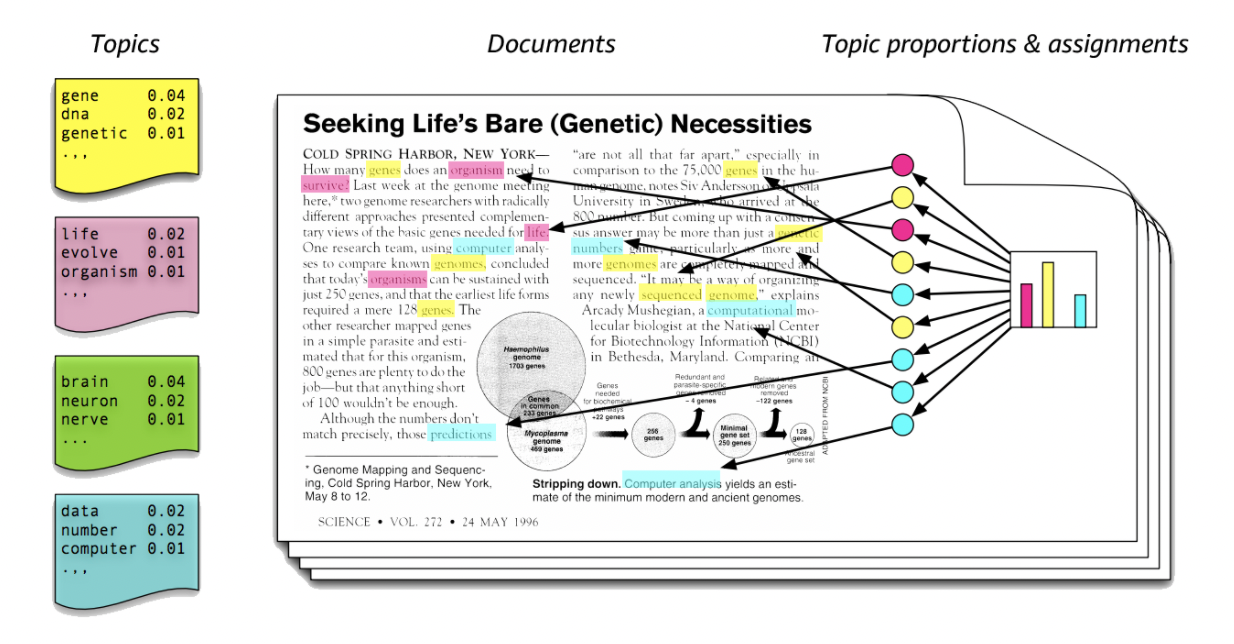
Source: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/06/01/LDA/

###**2-1-1. LDA 수행 순서**

*   토픽 개수 K개 설정한다.
*   모든 단어에 랜덤하게 K개 중 하나의 토픽을 할당(Allocation)한다.
*   랜덤으로 할당된 값은 대부분 틀린 값인 경우가 많기 때문에, 모든 문서 및 모든 단어에 아래의 사항을 반복(iterate)하여 수렴상태로 통일되게 한다.
   -  특정 문서 내의 단어 w에 대하여 아래의 두가지 기준으로 토픽을 재할당 한다.
     -  p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
     -   p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포

**<예시>**

아래와 같이 3개의 문서가 있다고 가정한다.

  * 문서1 : 나는 사과랑 바나나를 먹는다.
  * 문서2 : 나는 귀여운 침팬치가 좋다.
  * 문서3 : 활기차고 귀여운 침팬치가 바나나를 먹는다. 

그리고 주제는 2개가 있다고 가정하고, LDA로 토픽모델링을 수행하면 다음과 같은 결과가 산출된다. 

  *  p(topic t | document d) : 각 문서의 토픽 분포
    - 문서1 : 토픽A 100%
    - 문서2 : 토픽B 100%
    - 문서3 : 토픽B 60%, 토픽A 40%

  *  p(word w | topic t) : 각 토픽의 단어 분포 
    - 토픽A : 사과 20%, 바나나 40%, 먹는다 40%, 귀여운 0%, 침팬치 0%, 좋다 0%, 활기차고 0%
    - 토픽B : 사과 0%, 바나나 0%, 먹는다 0%, 귀여운 33%, 침팬치 33%, 좋다 16%, 활기차고 16%

#**3. LDA 토픽 모델링 활용 예제**

현재 글로벌 스마트 스피커 시장의 열기가 매우 뜨겁다. 스마트 스피커란 IoT 음성인식 AI assistant가 탑재된 기기 및 서비스를 말한다. 대표적인 제품으로는 Amazon Echo(Alexa), Apple HomePod(Siri), Google Home(Ok google) 등이 있다. 그 중 시장점유율이 가장 높은 'Amazon Echo'을 대상으로, 이를 구매한 구매자들의 리뷰 데이터를 사용해 LDA 토픽 모델을 생성하고 해당 상품에 대한 인식이나 이미지 등의 인사이트를 발굴해본다.

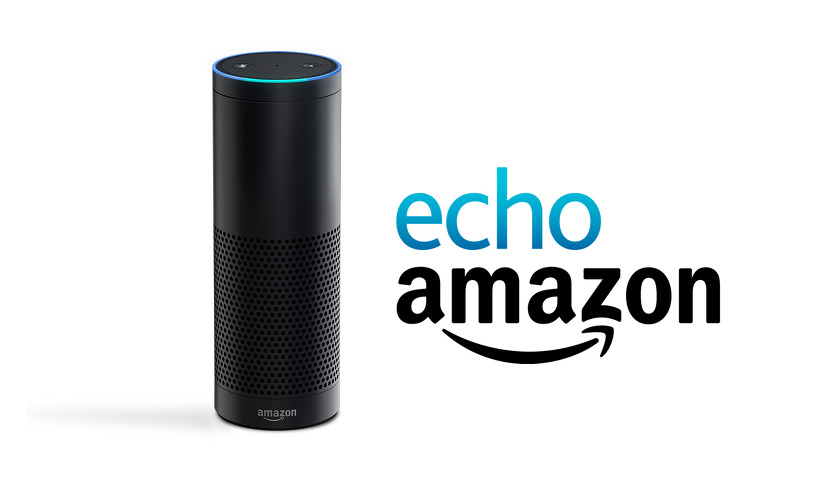

##**3-1. 필요한 라이브러리 로드하기**

In [ ]:
import pandas as pd
import numpy as np
import re 
from collections import defaultdict # 기본값이 있는 딕셔너리 모듈
import gensim # LDA 모델을 시각화할 수 있는 라이브러리
from gensim import corpora # 토픽모델링을 위한 라이브러리
from gensim.models import LdaModel # LDA 모델 사용
from gensim.models.coherencemodel import CoherenceModel #모델 평가
import nltk
nltk.download('stopwords') #불용어 사전
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##**3-2. 데이터 불러오기**

웹사이트 크롤링 서비스를 제공하는 [ScrapeHero](https://www.scrapehero.com/marketplace/)로부터 데이터를 수집하였다. 원하는 웹페이지의 url과 기타 조건들을 입력하면 별도의 코딩 없이 데이터를 획득할 수 있다. ScrapeHero에서는 아마존, 월마트, 인스타그램, 구글지도, 링크드인 등의 크롤링 서비스를 제공한다. 무료버전으로 25페이지까지 데이터를 수집할 수 있다.


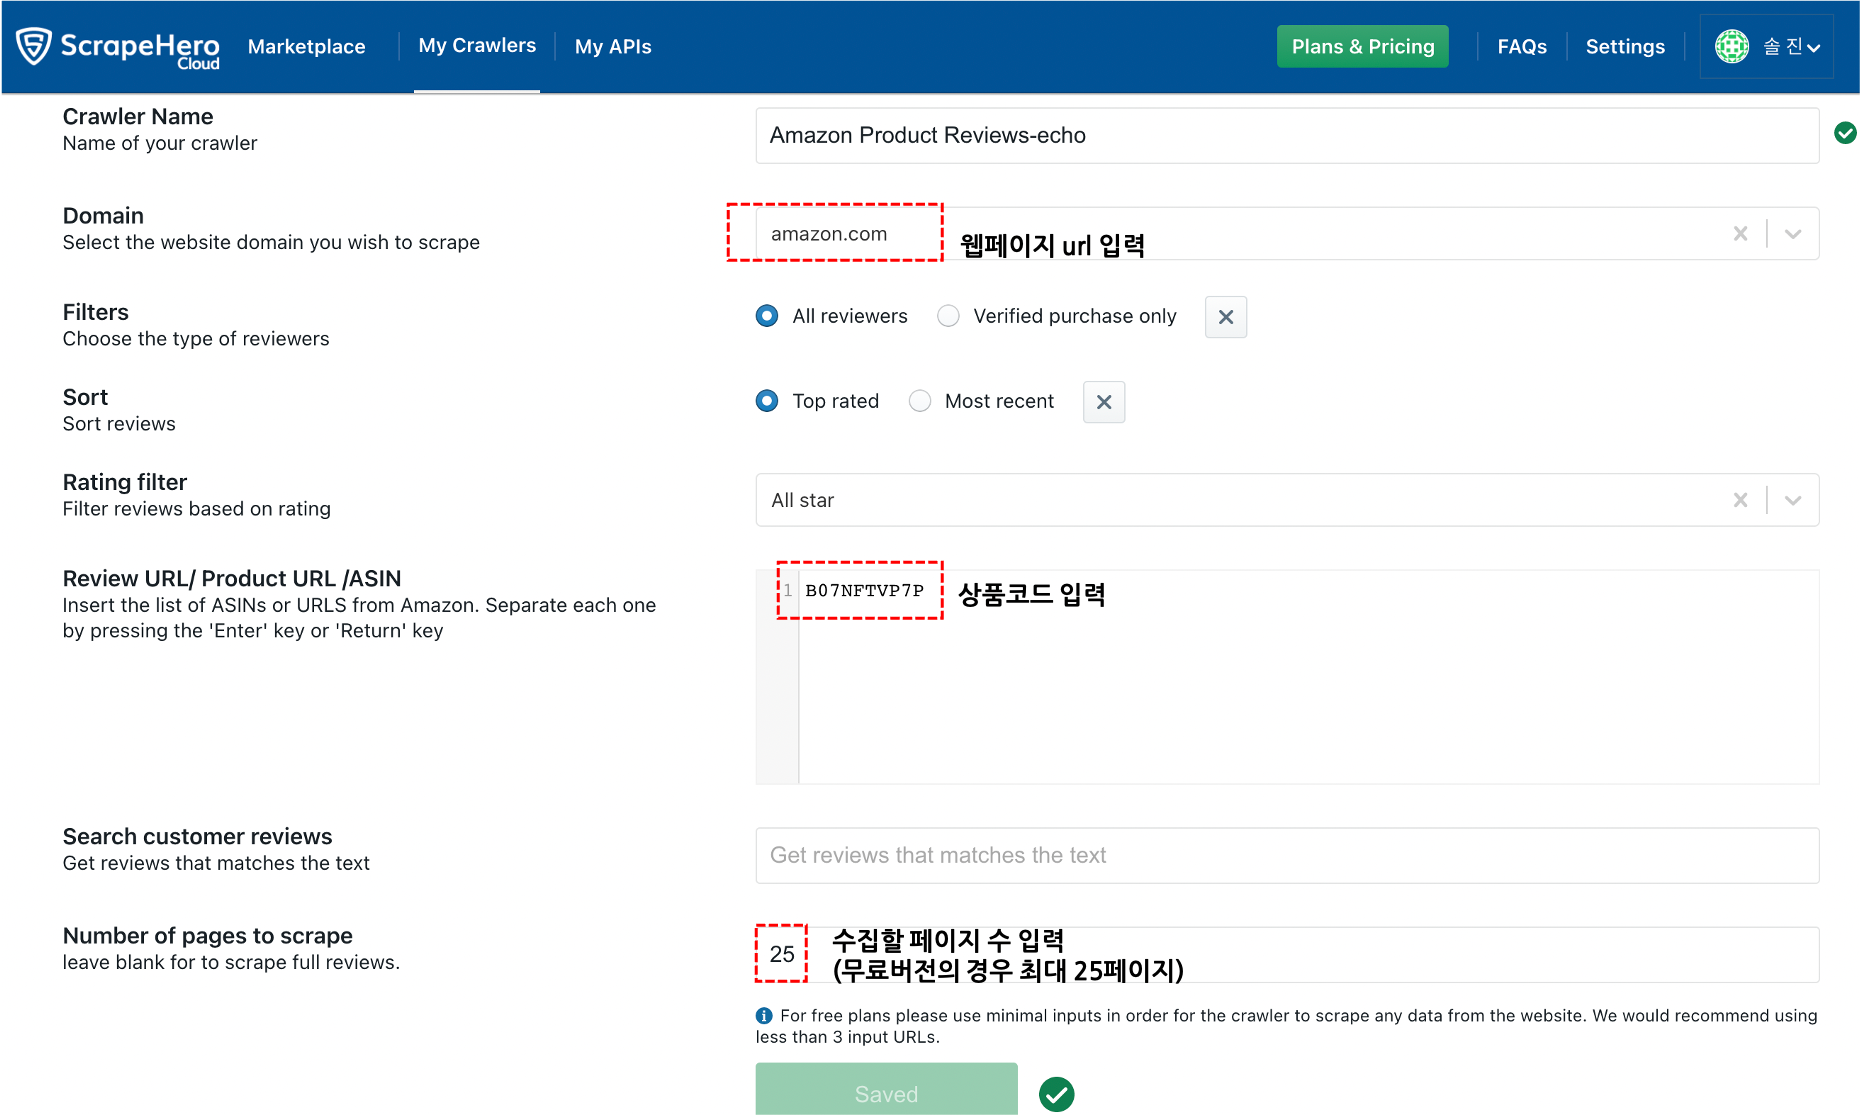

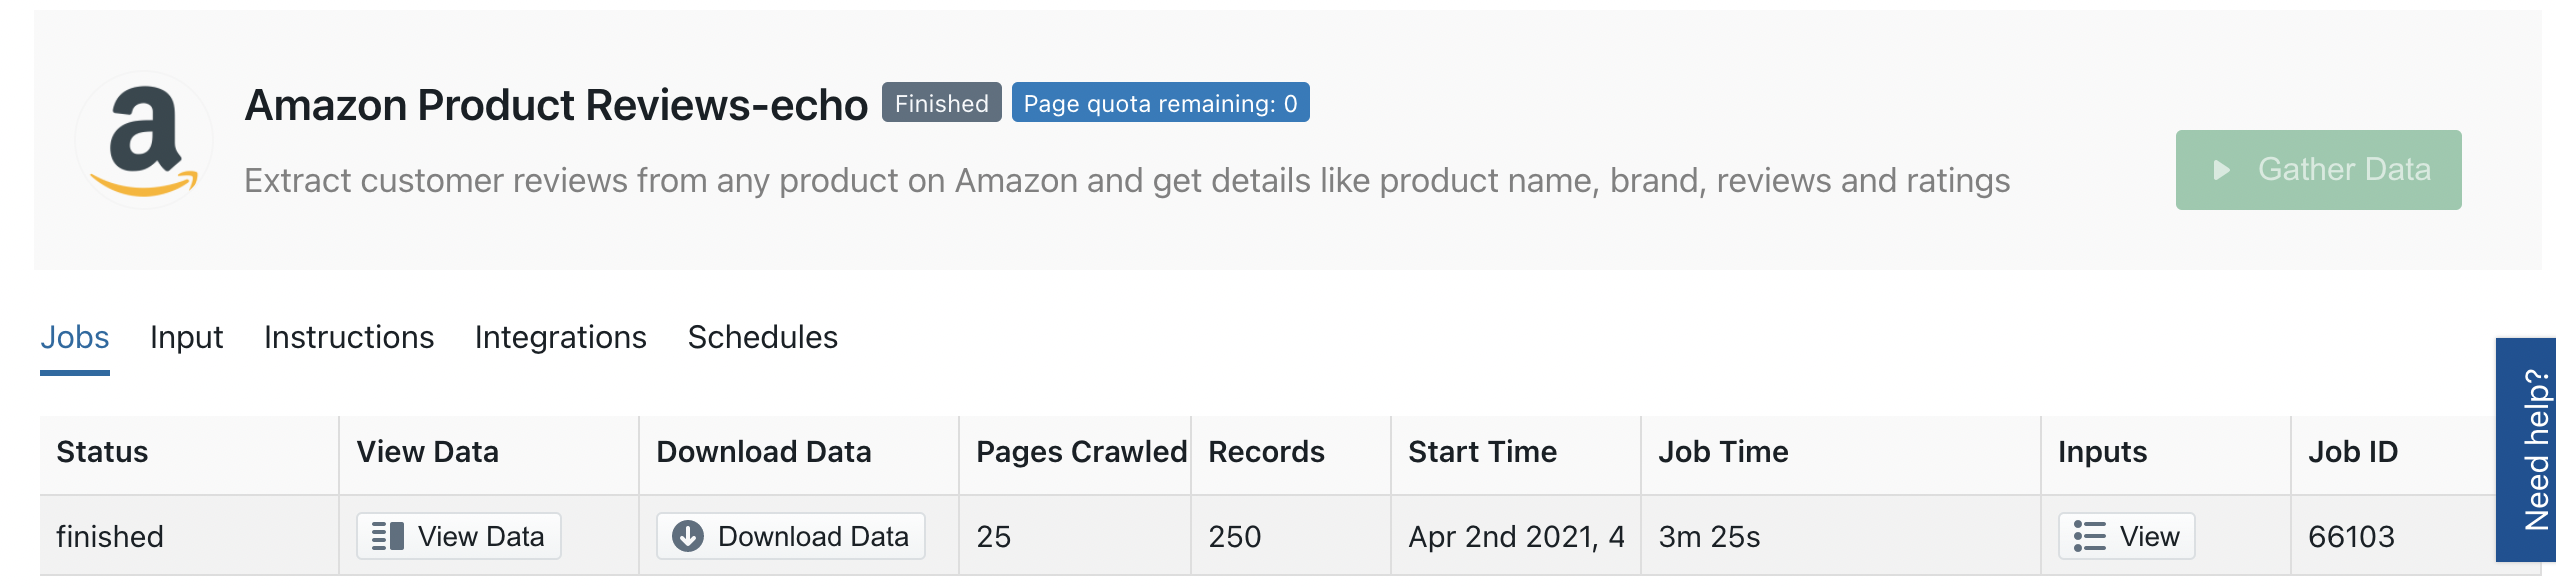

In [ ]:
data_url = 'https://raw.githubusercontent.com/Sol-J/Study/master/data/Amazon_echo_review_data(250).csv' 
df = pd.read_csv(data_url, encoding='utf-8') 
df.head(10)

asin  ...       input
0  B07NFTVP7P  ...  B07NFTVP7P
1  B07NFTVP7P  ...  B07NFTVP7P
2  B07NFTVP7P  ...  B07NFTVP7P
3  B07NFTVP7P  ...  B07NFTVP7P
4  B07NFTVP7P  ...  B07NFTVP7P
5  B07NFTVP7P  ...  B07NFTVP7P
6  B07NFTVP7P  ...  B07NFTVP7P
7  B07NFTVP7P  ...  B07NFTVP7P
8  B07NFTVP7P  ...  B07NFTVP7P
9  B07NFTVP7P  ...  B07NFTVP7P

[10 rows x 19 columns]

In [ ]:
reviews = list(np.array(df['review_text'].tolist())) #리뷰만 추출해서 데이터타입을 리스트로 변환
reviews

['I have tried Alexa and I have tried the G word and the A word out performs the G word any day. I lost connection over and over with the G word and so far after more than a month, I have never lost connection with Miss Alexa so I am very happy and being a prime member And being able to pay for it monthly you just can’t beat that so thank you Amazon you will have a prime member as long as I’m around. The bass quality is awesome....the sound quality, and if you don’t know the difference i’m sorry, is awesome and me being an audiophile I don’t use The word awesome lightly. You can’t go wrong with Miss Alexa.',
 "This product isn't very high ranking in any particular area. It is super awesome to have in my home, and has basically given music back to me. A thing that I had lost. I wonder how well it would transmit a high quality audio feed to a timer? It controls my entire house from the center of home. It picks up on my voice easily from far away even when I'm not loud. Mostly. Sometimes 

##**3-3. 데이터 전처리**

In [ ]:
#문장 부호 제거
reviews = [re.sub(r'[^\w\s]','',str(item)) for item in reviews] #정규식 패턴과 일치하는 문자열을 substitution하는 메서드 

#불용어 제거
stopwords = set(stopwords.words('english')) 
texts = [[word for word in document.lower().split() if word not in stopwords] for document in reviews]

#{단어 : 빈도}의 딕셔너리 생성 
frequency = defaultdict(int) 
for text in texts:
    for token in text:
         frequency[token] += 1

#빈도가 2회 이상인 단어만 남김
texts = [[token for token in text if frequency[token] > 1] for text in texts]

LDA 토픽 모델을 생성하기 위해 필요한 두가지 입력값은 **{단어 : 단어 id}로 구성된 dictionary**와 **(단어 id, 빈도)로 구성된 corpus**이다. 다음의 코드를 통해 이들을 생성할 수 있다. 

In [ ]:
dictionary = corpora.Dictionary(texts)
print(dictionary.token2id) #딕셔너리로부터 생성된 각 단어(token)별 고유 id를 확인할 수 있음

{'able': 0, 'alexa': 1, 'amazon': 2, 'around': 3, 'audiophile': 4, 'awesome': 5, 'bass': 6, 'beat': 7, 'cant': 8, 'connection': 9, 'day': 10, 'difference': 11, 'dont': 12, 'far': 13, 'g': 14, 'go': 15, 'happy': 16, 'im': 17, 'know': 18, 'long': 19, 'lost': 20, 'member': 21, 'miss': 22, 'month': 23, 'monthly': 24, 'never': 25, 'pay': 26, 'performs': 27, 'prime': 28, 'quality': 29, 'sorry': 30, 'sound': 31, 'thank': 32, 'tried': 33, 'use': 34, 'word': 35, 'wrong': 36, 'absolutely': 37, 'alone': 38, 'also': 39, 'area': 40, 'audio': 41, 'away': 42, 'back': 43, 'basically': 44, 'becoming': 45, 'bit': 46, 'box': 47, 'center': 48, 'choices': 49, 'confused': 50, 'controls': 51, 'crazy': 52, 'creating': 53, 'different': 54, 'easily': 55, 'entire': 56, 'even': 57, 'feed': 58, 'free': 59, 'frustrated': 60, 'frustrating': 61, 'get': 62, 'getting': 63, 'given': 64, 'haha': 65, 'hands': 66, 'high': 67, 'home': 68, 'house': 69, 'instead': 70, 'isnt': 71, 'item': 72, 'keep': 73, 'lack': 74, 'little': 

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts] #doc2bow 메서드는 각 단어들의 등장 횟수를 세고, 그 결과를 수치화된 벡터(정수 식별자)로 반환해줌
print(corpus) #단어ID별 빈도를 반환해줌

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 2), (10, 1), (11, 1), (12, 2), (13, 1), (14, 3), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 2), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 5), (36, 1)], [(1, 4), (2, 1), (5, 1), (10, 1), (13, 1), (17, 1), (20, 1), (29, 1), (31, 1), (34, 1), (35, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 3), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), 

##**3-4. LDA 토픽 모델 생성**

In [ ]:
NUM_TOPICS = 5
ldamodel = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics = NUM_TOPICS, passes = 50)

In [ ]:
#각 토픽들의 주요 키워드와 각 키워드들의 기여도(가중치)확인
topics = ldamodel.show_topics()
for topic in topics:
    print(topic) 

(0, '0.025*"sound" + 0.018*"music" + 0.016*"echo" + 0.013*"speaker" + 0.012*"alexa" + 0.009*"like" + 0.009*"one" + 0.008*"good" + 0.008*"im" + 0.007*"speakers"')
(1, '0.025*"echo" + 0.019*"alexa" + 0.017*"one" + 0.013*"music" + 0.011*"amazon" + 0.011*"play" + 0.008*"time" + 0.007*"turn" + 0.007*"home" + 0.007*"sound"')
(2, '0.023*"alexa" + 0.017*"echo" + 0.009*"app" + 0.009*"device" + 0.008*"would" + 0.008*"use" + 0.008*"amazon" + 0.007*"devices" + 0.007*"get" + 0.006*"like"')
(3, '0.013*"echo" + 0.011*"amazon" + 0.010*"replacement" + 0.010*"devices" + 0.010*"work" + 0.007*"dont" + 0.006*"bluetooth" + 0.006*"support" + 0.006*"us" + 0.006*"days"')
(4, '0.046*"echo" + 0.025*"gen" + 0.015*"plus" + 0.014*"sound" + 0.012*"2nd" + 0.011*"music" + 0.009*"generation" + 0.007*"3rd" + 0.006*"device" + 0.006*"alexa"')


In [ ]:
#결과를 데이터프레임으로 정리하기
word_dict = {};
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 30)
    word_dict['Topic{}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic1   Topic2   Topic3       Topic4      Topic5
0      sound     echo    alexa         echo        echo
1      music    alexa     echo       amazon         gen
2       echo      one      app  replacement        plus
3    speaker    music   device      devices       sound
4      alexa   amazon    would         work         2nd
5       like     play      use         dont       music
6        one     time   amazon    bluetooth  generation
7       good     turn  devices      support         3rd
8         im     home      get           us      device
9   speakers    sound     like         days       alexa
10    better     like    smart       either     devices
11      bass    would     plus          get       first
12   quality     plus      one       doesnt      better
13       get      get     even      problem           2
14     would   google    sound       device     playing
15    volume      set      say         tech     speaker
16      well    smart     time         good     quality
17     voice     want     home        alexa         new
18    really    light     also        still         1st
19    amazon   better     work      quality         one
20    system  speaker     wifi        never      amazon
21      room      use       im       update      volume
22      much      dot     well        music           3
23    bought   lights      set         plus       would
24      even      two      got          dot         dot
25     first     room    voice         fine        time
26      high      ask   things       return       echos
27      play   stereo     cant       issues       great
28       dot      app    music          ive        also
29     audio  devices      new            3      really

위의 결과를 토대로 다음과 같이 토픽을 요약할 수 있다.

*  토픽 1 : 음향(bass, volume, voice, speaker, audio)에 관하여 긍정적인 언급(like, good, well, much)을 하고 있다. 
*  토픽 2 : 조명(light, lights) 제어와 관련해서 타사 제품인 '구글 홈'과 비교되고 있다. 
*  토픽 3 : 아마존에코 장치를 알렉사 앱에 연동하는 부분에서 wifi, music과 관련된 이슈가 있다. 
*  토픽 4 : 블루투스 연결 시 약간의 문제(doesn't work, issues, problem 등) 가 있다. 
*  토픽 5 : 구 세대(ehco plus, ehco dot, 1st, 2nd)와 신제품(3rd, gen)에 대한 비교(better, great, also)도 언급되고 있다. 




##**3-5. 모델 평가**


In [ ]:
# UMass는 주제의 일관성을 평가하는 가장 빠른 지표이다. 
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence="u_mass") 
coherence_lda = coherence_model_lda.get_coherence() 
print('Coherence Score (u_mass): ', coherence_lda) #Coherence Score가 0에 가까울 수록 완벽한 일관성을 가진다는 의미이다.

Coherence Score (u_mass):  -1.0767366457362615


##**3-6. 토픽 시각화**

pyLDAvis라는 라이브러리를 사용하여 토픽 모델링 결과를 시각화 할 수 있다. 결과 해석은 아래의 내용을 참고하면 된다. 

*   좌측의 원들은 각각의 토픽들을 나타낸다. 각각의 토픽들을 2차원 공간에 축소하여 토픽 간의 관계를 살펴볼 수 있도록 한다.
*   원의 크기가 클 수록 좀 더 일반적인 토픽이라고 볼 수 있다.
*   원들 간의 거리는 각 토픽들이 서로 얼마나 다른지를 보여준다. 만약 두 개의 원이 겹친다면, 이 두개의 토픽은 유사한 토픽이라는 의미이다. 
*   따라서 좋은 토픽 모델은 하나의 사분면에서 전체적으로 골고루 흩어져있는 구조를 가진다. 
*   원을 하나 클릭하면, 우측에 단어와 막대그래프가 업데이트된다. 이 단어들은 해당 토픽을 형성하는 주요 키워드들을 의미한다. 
*   λ 파라미터를 조절함으로써 각 토픽의 키워드들에 대한 순위(rank)를 조정할 수 있다. 토픽 별 타당한 키워드를 도출하기 위해서는 최적의  λ 값을 설정할 필요가 있다.
    -  λ = 1인 경우 토픽 별로 가장 자주 등장하는 단어들을 우선적으로 키워드로 선택한다.
    -  λ = 0인 경우 토픽 간에 차이가 많이 나타나는 차별적인 단어를 우선적으로 키워드로 선택한다. 토픽의 분별력을 높이는 데에 도움이 된다. 

In [ ]:
!pip install pyLDAvis==2.1.2 

In [ ]:
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)